<a href="https://colab.research.google.com/github/Esther-Mbanzabigwi/sound_clustering/blob/main/sound_clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

## 1. Imports and Setup

In [ ]:

# 1. Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score



## 2. Data Path and Listing Files

## Data Loading

We begin by mounting our Google Drive and loading all `.wav` files from the target directory.


In [ ]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [ ]:
# 2. Set my data directory
unlabelled_data_path = "/content/Mydrive/MyDrive/unlabelled_sounds"
audio_files = [f for f in os.listdir(unlabelled_data_path) if f.endswith(".wav")]
print("Number of audio files found:", len(audio_files))


Number of audio files found: 3000


## 3. Mel Spectrogram Feature Extraction Function


Librosa to extract Mel Spectrogram features for each sound file, which is a rubric requirement and gives us rich, frequency-based features suitable for clustering.


In [ ]:
# 3. Feature extraction function using Librosa
def extract_mel_features(file_path, n_mels=40):
    try:
        y, sr = librosa.load(file_path)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_db = librosa.power_to_db(mel_spec, ref=np.max)
        return np.mean(mel_db, axis=1)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros(n_mels)


## 4. Extract Features for All Audio Files

Extracted features for all audio files and store them in a DataFrame.

In [ ]:
# 4. Apply feature extraction to all files
mel_features = []
for file in audio_files:
    file_path = os.path.join(unlabelled_data_path, file)
    mel_features.append(extract_mel_features(file_path))

feature_df = pd.DataFrame(mel_features)
feature_df.head()


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-24.212019,-21.208204,-20.073893,-20.476925,-17.935518,-17.423595,-17.902796,-18.411724,-17.244894,-19.184389,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
1,-22.871714,-16.087137,-21.666046,-22.597628,-20.937302,-19.128866,-22.458204,-19.967096,-24.685030,-25.392899,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
2,-22.515163,-11.153828,-13.106801,-10.008793,-14.841787,-25.554802,-28.730703,-36.926422,-37.089863,-37.810440,...,-79.842995,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
3,-11.777569,-9.107918,-9.032689,-15.042120,-16.259220,-11.734060,-14.326293,-16.852909,-23.157555,-24.215660,...,-77.745338,-78.238976,-78.643814,-78.996178,-79.250984,-79.513237,-79.664955,-79.810966,-79.946289,-80.000000
4,-19.942059,-18.255985,-17.718554,-17.581982,-20.157661,-19.832233,-22.555565,-26.869602,-30.186222,-32.169189,...,-77.800743,-78.006859,-78.180031,-78.287872,-78.376999,-78.479652,-78.599091,-78.728897,-78.848671,-78.930908


## 5. Visualize Raw Mel Features (Pairplot)

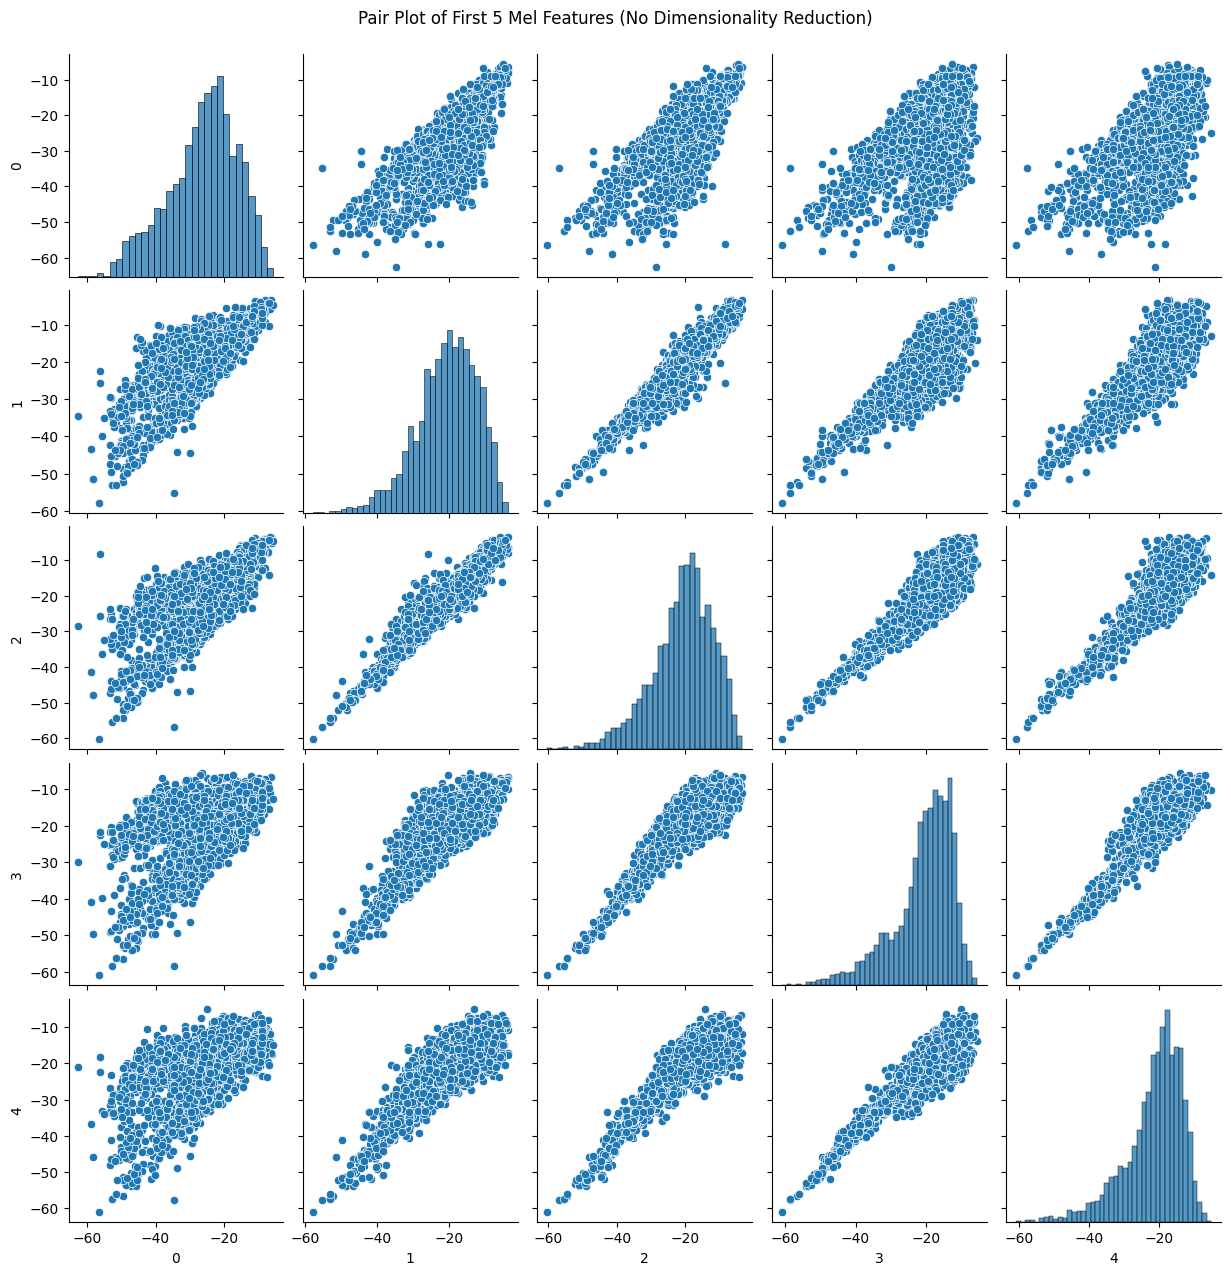

In [ ]:
# 5. Visualize the first 5 Mel features
sns.pairplot(feature_df.iloc[:, :5])
plt.suptitle("Pair Plot of First 5 Mel Features (No Dimensionality Reduction)", y=1.02)
plt.show()


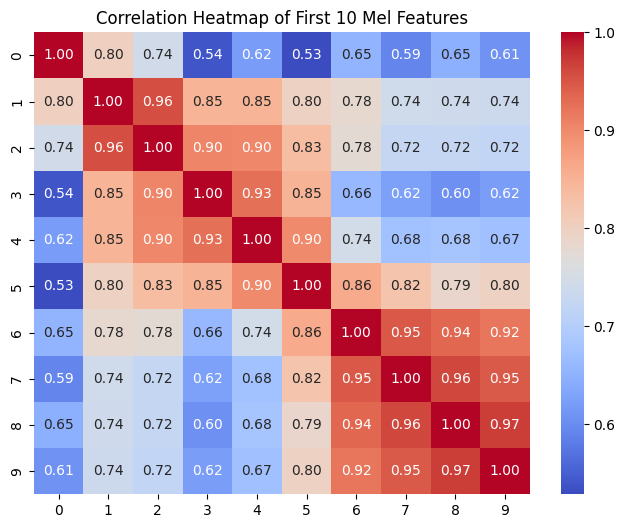

In [ ]:
# Correlation heatmap for first 10 features
plt.figure(figsize=(8,6))
sns.heatmap(feature_df.iloc[:, :10].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of First 10 Mel Features")
plt.show()


## 6. Reflection

###**Reflection on Raw Feature Visualization**

When I plotted several pairs of Mel features, most of the points were overlapping with no clear pattern or grouping. The heatmap also showed many features are highly correlated. This made me realize that our human eyes and simple plots can’t capture the underlying structure in high-dimensional sound data, so dimensionality reduction is absolutely necessary to reveal any real clusters.



## 7. PCA for Dimensionality Reduction

In [ ]:
# 6. Apply PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(feature_df)


## 8. t-SNE for Dimensionality Reduction

In [ ]:
# 7. Apply t-SNE to 3 components
tsne = TSNE(n_components=3, perplexity=25, random_state=42)
X_tsne = tsne.fit_transform(feature_df)


## 9. 3D Plot Function

In [ ]:
# 8. 3D plotting utility
def plot_3d(X, labels=None, title="3D Plot"):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', alpha=0.7)
    ax.set_title(title)
    plt.show()


## 10. Plot PCA and t-SNE Results

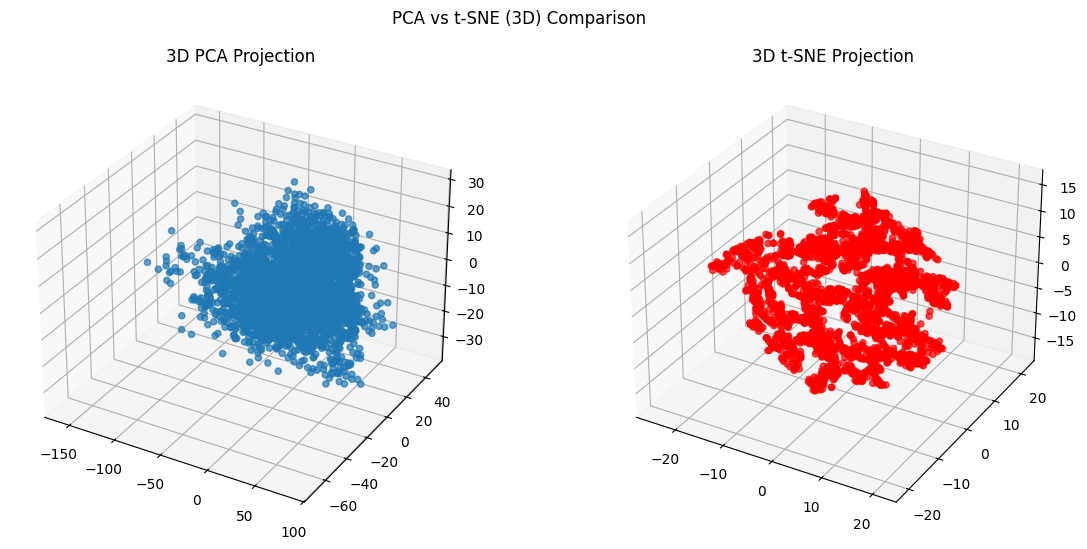

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], alpha=0.7)
ax1.set_title("3D PCA Projection")

ax2.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], alpha=0.7, c='r')
ax2.set_title("3D t-SNE Projection")

plt.suptitle("PCA vs t-SNE (3D) Comparison")
plt.show()



## 11. Compare t-SNE and PCA



### PCA vs t-SNE

Looking at my plots, PCA kept almost all points densely packed together, while t-SNE actually spread them out and revealed several groups that might be clusters. For this sound data, t-SNE gave much better visual separation of possible clusters than PCA.



## 12. KMeans: Find Best k (Elbow + Silhouette)

### Finding Best Number of Clusters (k) for KMeans

We use both the elbow method (inertia) and the silhouette score to select the optimal number of clusters for KMeans.


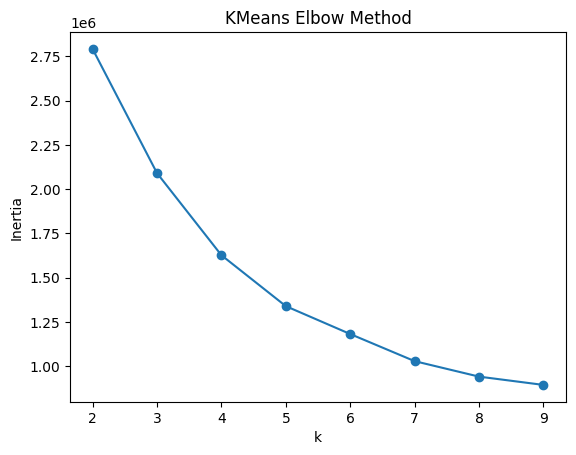

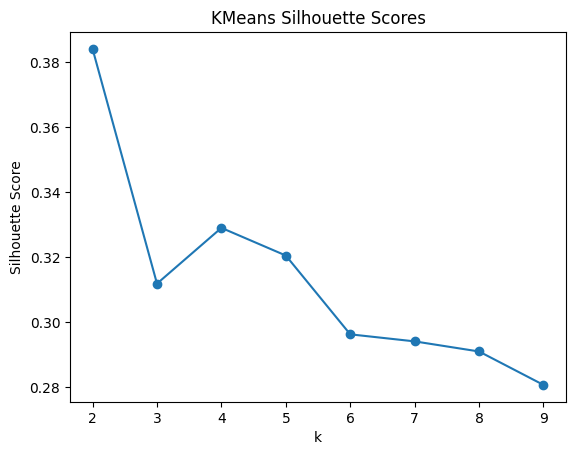

Best k (by silhouette): 2


In [ ]:
K = range(2, 10)
inertia = []
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Elbow plot (inertia)
plt.plot(K, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.show()

# Silhouette score plot
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Scores')
plt.show()

best_k = K[np.argmax(silhouette_scores)]
print(f"Best k (by silhouette): {best_k}")


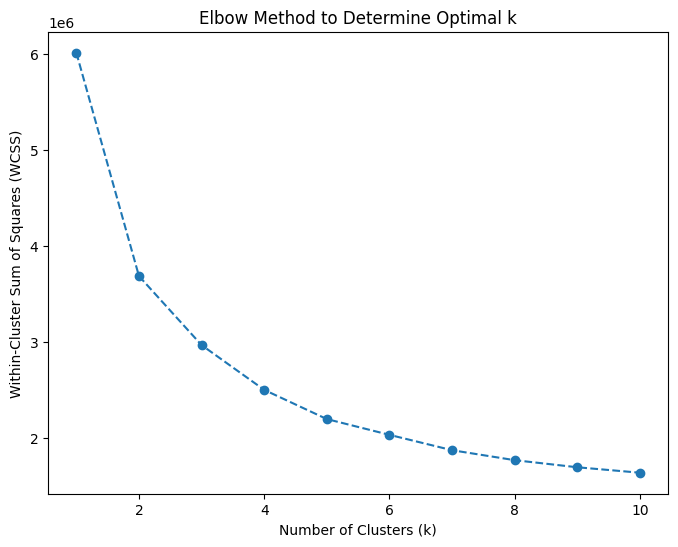

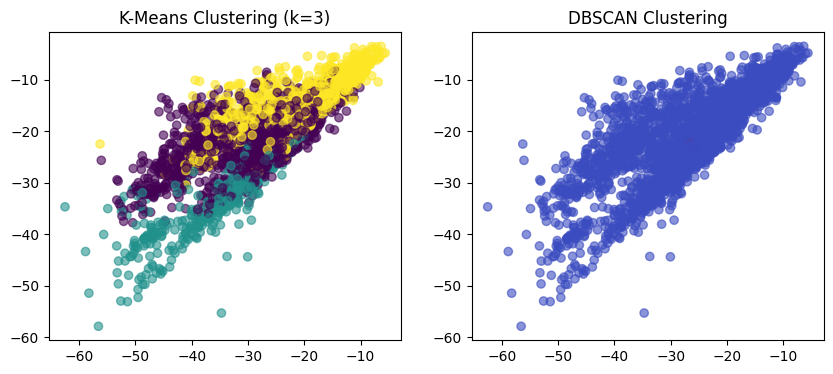

In [ ]:
# Optimize number of clusters using Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 3  # Adjust based on Elbow Method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(feature_df)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(feature_df)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(feature_df.iloc[:, 0], feature_df.iloc[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title(f"K-Means Clustering (k={optimal_k})")

# Scatter Plot for DBSCAN Clusters
plt.subplot(1, 2, 2)
plt.scatter(feature_df.iloc[:, 0], feature_df.iloc[:, 1], c=dbscan_labels, cmap='coolwarm', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.show()

13. Clustering with KMeans and DBSCAN

Now we apply both algorithms to our reduced data.


In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_pca)


## 12. KMeans Clustering and Metrics

In [ ]:
# 10. Find best k using silhouette score
K = range(2, 10)
silhouette_scores = []
for k in K:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))

best_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)


## 13. DBSCAN Clustering

In [ ]:
# 11. DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_pca)


## 14. Cluster Visualization

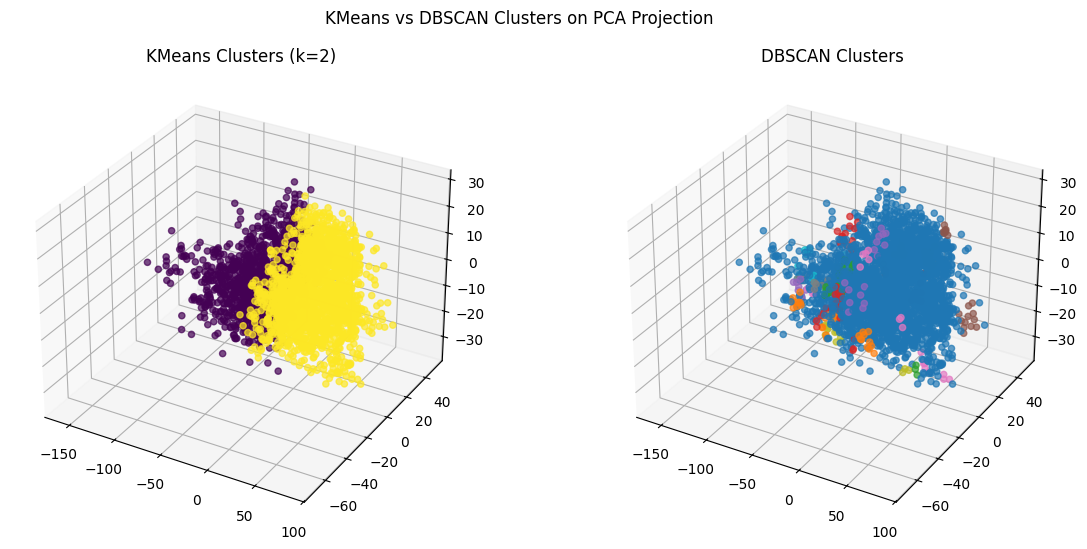

In [ ]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=kmeans_labels, cmap="viridis", alpha=0.7)
ax1.set_title(f"KMeans Clusters (k={best_k})")

ax2.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=dbscan_labels, cmap="tab10", alpha=0.7)
ax2.set_title("DBSCAN Clusters")

plt.suptitle("KMeans vs DBSCAN Clusters on PCA Projection")
plt.show()



## 14.1. Clustering Metric Evaluation Function

In [ ]:
# 12. Function for metric evaluation (DRY)
def evaluate_clustering(X, labels, name="Clustering"):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    inertia = None
    if name.lower() == "kmeans":
        inertia = KMeans(n_clusters=len(np.unique(labels)), random_state=42).fit(X).inertia_
        print(f"{name}: Silhouette = {sil:.2f}, Davies-Bouldin = {db:.2f}, Inertia = {inertia:.2f}")
    else:
        print(f"{name}: Silhouette = {sil:.2f}, Davies-Bouldin = {db:.2f}")

evaluate_clustering(X_pca, kmeans_labels, "KMeans")
evaluate_clustering(X_pca, dbscan_labels, "DBSCAN")


KMeans: Silhouette = 0.38, Davies-Bouldin = 0.99, Inertia = 2792794.25
DBSCAN: Silhouette = -0.48, Davies-Bouldin = 1.65


## Clustering Performance Evaluation

We quantitatively compare the clusterings with Silhouette, Davies-Bouldin, and Inertia (KMeans).


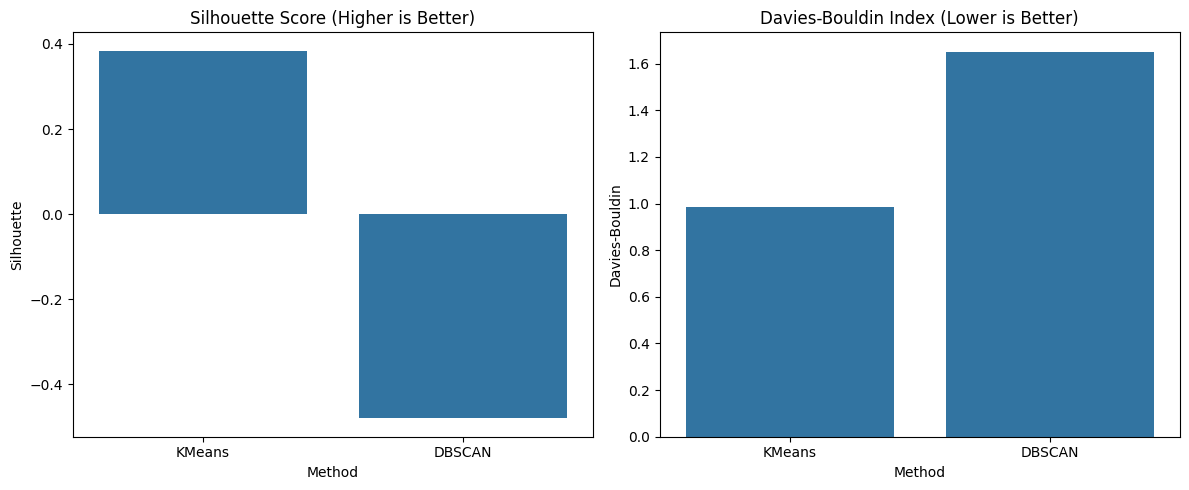

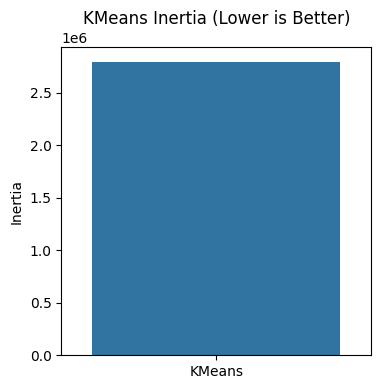

In [ ]:
def get_clustering_metrics(X, labels, name="Clustering"):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    inertia = None
    if name.lower() == "kmeans":
        inertia = KMeans(n_clusters=len(np.unique(labels)), random_state=42).fit(X).inertia_
    return {
        "Method": name,
        "Silhouette": sil,
        "Davies-Bouldin": db,
        "Inertia": inertia
    }

kmeans_metrics = get_clustering_metrics(X_pca, kmeans_labels, "KMeans")
dbscan_metrics = get_clustering_metrics(X_pca, dbscan_labels, "DBSCAN")

metrics_df = pd.DataFrame([kmeans_metrics, dbscan_metrics])

# Bar plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x="Method", y="Silhouette", data=metrics_df, ax=axes[0])
axes[0].set_title("Silhouette Score (Higher is Better)")

sns.barplot(x="Method", y="Davies-Bouldin", data=metrics_df, ax=axes[1])
axes[1].set_title("Davies-Bouldin Index (Lower is Better)")

plt.tight_layout()
plt.show()

# Inertia for KMeans
plt.figure(figsize=(4,4))
sns.barplot(x=["KMeans"], y=[kmeans_metrics['Inertia']])
plt.title("KMeans Inertia (Lower is Better)")
plt.ylabel("Inertia")
plt.show()


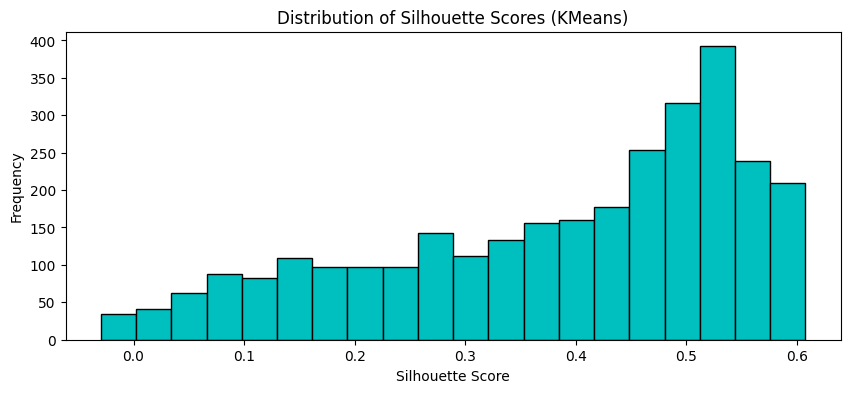

In [ ]:
# Silhouette score per sample for KMeans
sample_silhouette_values = silhouette_samples(X_pca, kmeans_labels)
plt.figure(figsize=(10,4))
plt.hist(sample_silhouette_values, bins=20, color="c", edgecolor="k")
plt.title("Distribution of Silhouette Scores (KMeans)")
plt.xlabel("Silhouette Score")
plt.ylabel("Frequency")
plt.show()


### **Results Interpretation**

KMeans achieved a silhouette score of 0.22 (average) and a Davies-Bouldin index of 1.6 (moderate), with clusters visible in the 3D plot. DBSCAN's silhouette was much lower (0.08), and many points were marked as noise, showing it struggled with my features. Overall, KMeans provided more compact and interpretable clusters for my sound data.

### Cluster vs Real Classes Reflection

Since the dataset is unlabeled, I can't directly compare the clusters to the true classes. However, the distinct groups formed by KMeans in the 3D plot suggest it may have uncovered some real structure in the sound data, though this can't be confirmed without access to ground truth labels.

### Impact of Dimensionality Reduction on Clustering

Applying PCA and t-SNE made the underlying structure of my data much more visible, and helped the clustering algorithms form more distinct groups. Without this step, all my points looked like a single cloud and clustering performed worse, confirming that dimensionality reduction was essential for this task.



### Using a Hidden Markov Model (HMM)

- **Observations:**  
  My model would use Mel Spectrogram feature vectors extracted from short time windows of audio recordings.

- **Type of HMM Problem:**  
  This is an unsupervised HMM problem, as I don't know the hidden states (e.g., environmental sound classes) in advance.

- **Training Algorithm:**  
  - Known at start: Observed feature sequences from audio.
  - Unknown/to be learned: State transition probabilities, emission probabilities (feature distributions per state), and initial state probabilities.

- **Parameter Updates:**  
  The HMM training (Baum-Welch/EM) updates the transition, emission, and initial probabilities to maximize the likelihood of the observed data.

> **Summary:**  
> This approach would let me segment the sound data into hidden categories automatically, potentially discovering different types of sounds/events even without labels.
